In [3]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../data/churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# UNiformizamos el nombre de las columnas a uno sin espacios, ni tildes ni mayusculas
from django.utils.text import slugify
df.columns = [slugify(_).replace('-', '_') for _ in list(df.columns)]

In [6]:
df.shape, df.columns

((3333, 21), Index(['state', 'account_length', 'area_code', 'phone_number',
        'international_plan', 'voice_mail_plan', 'number_vmail_messages',
        'total_day_minutes', 'total_day_calls', 'total_day_charge',
        'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
        'total_night_minutes', 'total_night_calls', 'total_night_charge',
        'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
        'customer_service_calls', 'churn'],
       dtype='object'))

In [7]:
df.dtypes

state                      object
account_length              int64
area_code                   int64
phone_number               object
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

In [8]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.describe(include=['object', 'bool'])

,state,phone_number,international_plan,voice_mail_plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,394-9220,no,no,False
freq,106,1,3010,2411,2850


In [10]:
# CAmbiamos el tipo de dato de toda la columna a entero
df['churn'] = df['churn'].astype('int')

# Realizamos un conteo por cada tipo de nuestra columna discreta
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [11]:
# Ademas podemos mostrar pocentajes y hasta tomar en cuenta los nulos
df['churn'].value_counts(normalize=True, dropna=False)

0    0.855086
1    0.144914
Name: churn, dtype: float64

## SORTING

In [12]:
# Pudes ordenar todo el dataset en funcion de un sola columna
df.sort_values(
    by='total_day_charge', ascending=False
).head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [13]:
# Al ordenar la data por varias columnas, puedes indicar el orden indiviual
df.sort_values(
    by=['churn', 'total_day_charge'], 
    ascending=[True, False]
).head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
688,MN,13,510,338-7120,no,yes,21,315.6,105,53.65,...,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,363-7802,no,yes,31,313.8,87,53.35,...,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,388-8583,no,yes,28,308.0,123,52.36,...,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


## Analizando comportamiento por CHURN

In [14]:
df[df['churn'] == 1].mean()

account_length            102.664596
area_code                 437.817805
number_vmail_messages       5.115942
total_day_minutes         206.914079
total_day_calls           101.335404
total_day_charge           35.175921
total_eve_minutes         212.410145
total_eve_calls           100.561077
total_eve_charge           18.054969
total_night_minutes       205.231677
total_night_calls         100.399586
total_night_charge          9.235528
total_intl_minutes         10.700000
total_intl_calls            4.163561
total_intl_charge           2.889545
customer_service_calls      2.229814
churn                       1.000000
dtype: float64

In [15]:
df[df['churn'] == 0].mean()

account_length            100.793684
area_code                 437.074737
number_vmail_messages       8.604561
total_day_minutes         175.175754
total_day_calls           100.283158
total_day_charge           29.780421
total_eve_minutes         199.043298
total_eve_calls           100.038596
total_eve_charge           16.918909
total_night_minutes       200.133193
total_night_calls         100.058246
total_night_charge          9.006074
total_intl_minutes         10.158877
total_intl_calls            4.532982
total_intl_charge           2.743404
customer_service_calls      1.449825
churn                       0.000000
dtype: float64

In [16]:
#¿Cuánto tiempo (en promedio) pasan los usuarios indecisos en el teléfono durante el día?
df[df['churn'] == 1]['total_day_minutes'].mean()

206.91407867494814

In [17]:
df[lambda _: _.churn == 1]['total_day_minutes'].mean()

206.91407867494814

In [18]:
#¿Cuál es la duración máxima de las llamadas internacionales entre usuarios leales (Churn == 0) 
#que no tienen un plan internacional?
df[(df['churn'] == 0) & (df['international_plan'] == 'no')]['total_intl_minutes'].max()

18.9

In [19]:
# Las 6 primeras filas desde una columna a otra

df.loc[0:5, 'state':'area_code']

,state,account_length,area_code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [20]:
df.iloc[0:5, 0:3]

,state,account_length,area_code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [21]:
# Apartir de la ultima fila
df[-1:]

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


In [22]:
# Obtener el maximo de todas la columnas numericas:
df.apply(np.max) 

state                           WY
account_length                 243
area_code                      510
phone_number              422-9964
international_plan             yes
voice_mail_plan                yes
number_vmail_messages           51
total_day_minutes            350.8
total_day_calls                165
total_day_charge             59.64
total_eve_minutes            363.7
total_eve_calls                170
total_eve_charge             30.91
total_night_minutes            395
total_night_calls              175
total_night_charge           17.77
total_intl_minutes              20
total_intl_calls                20
total_intl_charge              5.4
customer_service_calls           9
churn                            1
dtype: object

In [23]:
# Todas las filas donde estado inice con 'W'
df_w = df[df['state'].apply(lambda state: state[0] == 'W')]
df_w.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,...,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,...,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


In [24]:
# 2da forma
df_w_2 = df[df['state'].str.startswith('W')]
df_w_2.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,...,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,...,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


In [25]:
df_w_2.shape, df_w.shape

((327, 21), (327, 21))

In [27]:
# Reemplazar los vallores de las columnas
df['international_plan'].unique(), df['international_plan'].isnull().any()

(array(['no', 'yes'], dtype=object), False)

In [28]:
df['international_plan'] = df['international_plan'].map({'no' : 0, 'yes' : 1})
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,0,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [29]:
df['voice_mail_plan'].isnull().any()

False

In [30]:
df['voice_mail_plan'] = df['voice_mail_plan'].map({'no' : 0, 'yes' : 1})
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Grupos

In [38]:
columns_to_show = ['total_day_minutes', 'total_eve_minutes', 
                   'total_night_minutes']

df.groupby(by=['churn'])[columns_to_show].agg(['min', 'max', 'mean', 'skew'])

total_day_minutes                              total_eve_minutes         \
                    min    max        mean      skew               min    max   
churn                                                                           
0                   0.0  315.6  175.175754 -0.226378               0.0  361.8   
1                   0.0  350.8  206.914079 -0.199223              70.9  363.7   

                            total_night_minutes                               
             mean      skew                 min    max        mean      skew  
churn                                                                         
0      199.043298 -0.043140                23.2  395.0  200.133193  0.017230  
1      212.410145  0.033129                47.4  354.9  205.231677 -0.005073

In [34]:
df.groupby(by=['churn'])[columns_to_show].describe(percentiles=[])

total_day_minutes                                            \
                  count        mean        std  min    50%    max   
churn                                                               
0                2850.0  175.175754  50.181655  0.0  177.2  315.6   
1                 483.0  206.914079  68.997792  0.0  217.6  350.8   

      total_eve_minutes                                             \
                  count        mean        std   min    50%    max   
churn                                                                
0                2850.0  199.043298  50.292175   0.0  199.6  361.8   
1                 483.0  212.410145  51.728910  70.9  211.3  363.7   

      total_night_minutes                                              
                    count        mean        std   min     50%    max  
churn                                                                  
0                  2850.0  200.133193  51.105032  23.2  200.25  395.0  
1                   483.0  205.231677  47.132825  47.4  204.80  354.9

# Referencias Cruzadas

In [39]:
# COnteo de Churn vs pland internacional
pd.crosstab(
    df['churn'], df['international_plan']
)

international_plan,0,1
churn,,
0,2664,186
1,346,137


In [41]:
# Porcentaje de plances de voz con respecto al Churn
pd.crosstab(
    df['voice_mail_plan'], 
    df['churn'], 
    normalize=True
)

churn,0,1
voice_mail_plan,,
0,0.602460,0.120912
1,0.252625,0.024002


In [42]:
# Numero promedio de Churn por plan de voz
df.pivot_table(
    ['churn'], ['voice_mail_plan'], 
    aggfunc='mean'
)

,churn
voice_mail_plan,
0,0.167151
1,0.086768


In [43]:
# Número promedio de llamadas de día, de noche y de noche por código de área:
df.pivot_table(
    ['total_day_calls', 'total_eve_calls', 'total_night_calls'],
    ['area_code'], 
    aggfunc='mean'
)

,total_day_calls,total_eve_calls,total_night_calls
area_code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


In [44]:
# Analisis de prediccion
pd.crosstab(df['churn'], df['international_plan'], margins=True)

international_plan,0,1,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


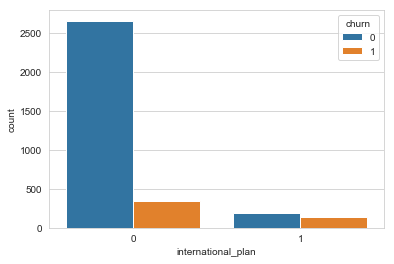

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.countplot(x='international_plan', hue='churn', data=df);


In [50]:
pd.crosstab(
    df['churn'], df['customer_service_calls'],
    margins=True
)

customer_service_calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


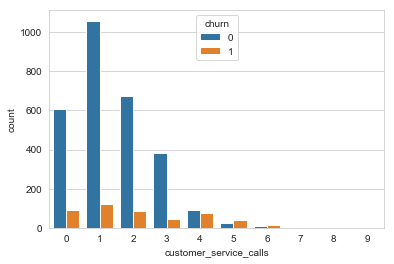

In [51]:
sns.countplot(
    x='customer_service_calls',
    hue='churn',
    data=df
)

In [52]:
df['many_service_calls'] = (df['customer_service_calls'] > 3).astype('int')
pd.crosstab(df['many_service_calls'], df['churn'], margins=True)

churn,0,1,All
many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


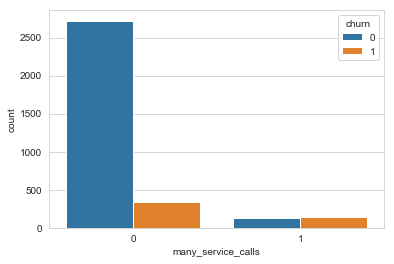

In [53]:
sns.countplot(
    x='many_service_calls', hue='churn', data=df
)

In [65]:
# Predccion de que no haiga Chrun 85.23 %
# En base a las llamadas al servicio y el plan internacional
pd.crosstab(
    df['many_service_calls'] & df['international_plan'] ,
    df['churn'], normalize=True
)

churn,0,1
row_0,,
0,0.852385,0.139214
1,0.002700,0.005701


In [66]:
# Bajo ese analisis solo se erro en 469 + 9 cassos
pd.crosstab(
    df['many_service_calls'] & df['international_plan'] ,
    df['churn']
)

churn,0,1
row_0,,
0,2841,464
1,9,19
